In [2]:
#Author:WitsOnTweets
    #This module extracts tweets from Twitter using Twitter API based on Any Keyword between given dates


In [1]:
#Usage:Libraries
    #Tweepy:For extracting Data from the Twitter using the keys provided
    #re:Regular Expression used in the code to remove the emojis, urls or non-alphanum characters
    #nltk:Natural Language Toolkit for Basic Text Processing . Here it is used to remove Stopwords(Words that dont convey any meaning)
    #and tokenize the sentence in words
    #load_model:Our own Model which we converted into package to detect sentiment of a sentence with 76.72% accuracy


import tweepy
from tweepy import OAuthHandler
import csv
import re
from string import punctuation
from nltk import word_tokenize
from nltk.corpus import stopwords
import load_model_library as lm

Using TensorFlow backend.


In [3]:
#Keys used for extracting data from Twitter

consumer_key = 'your consumer key'
consumer_secret = 'your consumer secret'
access_token = 'your access token'
access_secret = 'your access secret'

In [4]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [5]:
api = tweepy.API(auth)

original tweet: Exams are coming!!! Scared with @divyanshu1012 and many others
Punctuation removed: Exams are coming Scared with divyanshu1012 and many others
Tweet After Removing Non-Alphanumeric characters: Exams are coming Scared with divyanshu1012 and many others
Tweet After Emoticons and URLs Removed: Exams are coming Scared with divyanshu1012 and many others
Finally Processed Tweet: Exams are coming Scared with divyanshu1012 and many others

Tweet after negation handling exam coming scared divyanshu1012 many others 
'divyanshu1012' not in training corpus; ignoring.
0
The sentiment of tweet is NEGATIVE!!!



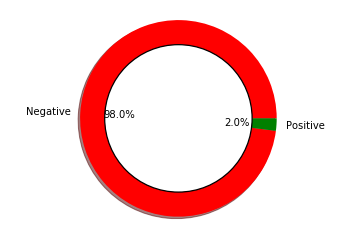

0
original tweet: @divyanshu1012  I can't find you anywhere these days.. You are not fun anymore🤓😑
Punctuation removed: divyanshu1012  I cant find you anywhere these days You are not fun anymore🤓😑
Tweet After Removing Non-Alphanumeric characters: divyanshu1012  I cant find you anywhere these days You are not fun anymore
Tweet After Emoticons and URLs Removed: divyanshu1012  I cant find you anywhere these days You are not fun anymore
Finally Processed Tweet: divyanshu1012  I cant find you anywhere these days You are not fun anymore

Tweet after negation handling divyanshu1012 cant find anywhere day notfun anymore 
'divyanshu1012' not in training corpus; ignoring.
0
The sentiment of tweet is NEGATIVE!!!



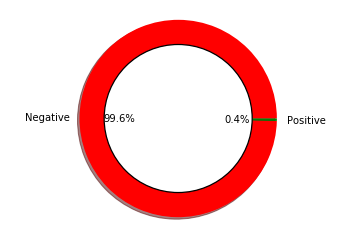

0
original tweet: @divyanshu1012 Dude you should stop being so shy... People would all walk over you if this goes on
Punctuation removed: divyanshu1012 Dude you should stop being so shy People would all walk over you if this goes on
Tweet After Removing Non-Alphanumeric characters: divyanshu1012 Dude you should stop being so shy People would all walk over you if this goes on
Tweet After Emoticons and URLs Removed: divyanshu1012 Dude you should stop being so shy People would all walk over you if this goes on
Finally Processed Tweet: divyanshu1012 Dude you should stop being so shy People would all walk over you if this goes on

Tweet after negation handling divyanshu1012 dude stop shy people would walk go 
'divyanshu1012' not in training corpus; ignoring.
1
The sentiment of tweet is somewhat NEUTRAL or NOT SURE !!!



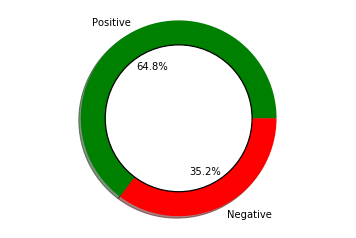

1
original tweet: @divyanshu1012 you are regularly irregular. -__-
Punctuation removed: divyanshu1012 you are regularly irregular 
Tweet After Removing Non-Alphanumeric characters: divyanshu1012 you are regularly irregular 
Tweet After Emoticons and URLs Removed: divyanshu1012 you are regularly irregular 
Finally Processed Tweet: divyanshu1012 you are regularly irregular 

Tweet after negation handling divyanshu1012 regularly irregular 
'divyanshu1012' not in training corpus; ignoring.
1
The sentiment of tweet is somewhat NEUTRAL or NOT SURE !!!



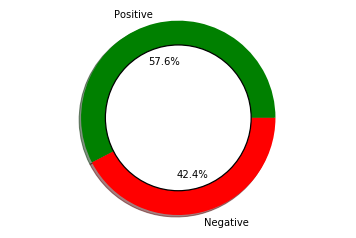

1
original tweet: @divyanshu1012 Best of Luck for your internship. I wish the best for you
Punctuation removed: divyanshu1012 Best of Luck for your internship I wish the best for you
Tweet After Removing Non-Alphanumeric characters: divyanshu1012 Best of Luck for your internship I wish the best for you
Tweet After Emoticons and URLs Removed: divyanshu1012 Best of Luck for your internship I wish the best for you
Finally Processed Tweet: divyanshu1012 Best of Luck for your internship I wish the best for you

Tweet after negation handling divyanshu1012 best luck internship wish best 
'divyanshu1012' not in training corpus; ignoring.
1
The sentiment of tweet is POSITIVE!!!



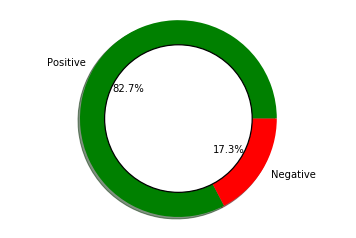

1
original tweet: @divyanshu1012 The Justice League Snyder Cut is coming out soon.... Finally something good to look upon this year
Punctuation removed: divyanshu1012 The Justice League Snyder Cut is coming out soon Finally something good to look upon this year
Tweet After Removing Non-Alphanumeric characters: divyanshu1012 The Justice League Snyder Cut is coming out soon Finally something good to look upon this year
Tweet After Emoticons and URLs Removed: divyanshu1012 The Justice League Snyder Cut is coming out soon Finally something good to look upon this year
Finally Processed Tweet: divyanshu1012 The Justice League Snyder Cut is coming out soon Finally something good to look upon this year

Tweet after negation handling divyanshu1012 justice league snyder cut coming soon finally something good look upon year 
'divyanshu1012' not in training corpus; ignoring.
1
The sentiment of tweet is POSITIVE!!!



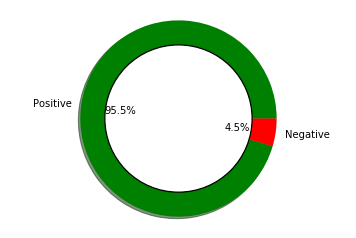

1


In [7]:
File = open('div.txt', 'a')

stop_words = set(stopwords.words('english'))

for tweet in tweepy.Cursor(api.search, q = "@divyanshu1012",since="2018-04-20",until="2018-04-29",lang = "en").items():
    
    proc_tweet=''#Finally written in result.txt
    
    no_punc=''.join([char for char in tweet.text if char not in punctuation])
    
    
    tweet_alphanum=''.join(e for e in no_punc if e.isalnum() or e == ' ')
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Regular expresssion for emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    
    no_emoji=emoji_pattern.sub(r'',tweet_alphanum)
    
    no_urls = re.sub(r"http\S+", "", no_emoji)
            
    proc_tweet=no_urls+"\n"
    
    print("original tweet:",tweet.text)
    print("Punctuation removed:",no_punc)
    print("Tweet After Removing Non-Alphanumeric characters:",tweet_alphanum)
    print("Tweet After Emoticons and URLs Removed:",no_urls)
    print("Finally Processed Tweet:",proc_tweet)
    
    
    
    try:
        proc_tweet.encode("utf-8")
        sentiment = lm.sentiment_donut(proc_tweet)
        #print(proc_tweet)
        print(sentiment)
        
        
        File.write(str(sentiment))
        File.write('\n')
        
        
    except BaseException as e:
        print("Error on_data: %s" % str(e))

File.close()